- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB
-  

In [81]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,StratifiedKFold,RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import sklearn as sk
import pandas as pd
import numpy as np

In [82]:
#Get data 
# Read in the data
from sklearn.preprocessing import MinMaxScaler


dataset = "partial_database.csv"
df = pd.read_csv("Database.csv")
dft = pd.read_csv(dataset)
#dfn = df.iloc[:, 299:435]
#dfn = pd.DataFrame(sk.preprocessing.normalize(dfn))
df = pd.concat([dfn, dft], axis=1)

"""
# Decomment this part if you dont have the labels in the csv file
# Read class labels
f = open("labelsDefault.txt", "r")
labels=f.read().splitlines()
labels.pop(0)

# Add y column, which is the target variable
df['y'] = list(map(int, labels))
"""
df.columns = df.columns.astype(str)
# Get X and y
Y=df['y']
X=df.drop(['y'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
"""
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
numbers_of_classes=np.unique(Y)
"""

'\nscaler = MinMaxScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)\nnumbers_of_classes=np.unique(Y)\n'

In [83]:
#Optimization 
model=MultinomialNB()
param_grid = {'alpha': np.linspace(0.5, 1.5, 6),
              'fit_prior': [True, False]}

random=RandomizedSearchCV(model,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
random.fit(X,Y)
print(random.best_params_)

{'fit_prior': False, 'alpha': 0.5}


Accuracy for class 1,2,3,4,5,6,7: 0.8726708074534162
accuracy global 0.2974308300395257
Accuracy for class 8: 0.9782608695652174
accuracy global 0.33992094861660077
Accuracy for class 9: 0.9347826086956522
accuracy global 0.3774703557312253
Accuracy for class 10: 0.782608695652174
accuracy global 0.4051383399209486
Accuracy for class 11: 0.6304347826086957
accuracy global 0.4150197628458498
Accuracy for class 12: 0.9347826086956522
accuracy global 0.4298418972332016
Accuracy for class 13: 0.45652173913043476
accuracy global 0.44960474308300397
Accuracy for class 14: 0.6739130434782609
accuracy global 0.466403162055336
Accuracy for class 15: 0.5652173913043478
accuracy global 0.48320158102766797
Accuracy for class 16: 0.5
accuracy global 0.5039525691699605
Accuracy for class 17: 0.717391304347826
accuracy global 0.5335968379446641
Accuracy for class 18: 0.45652173913043476
accuracy global 0.5543478260869565
Accuracy for class 19: 0.8260869565217391
accuracy global 0.5820158102766798
Acc

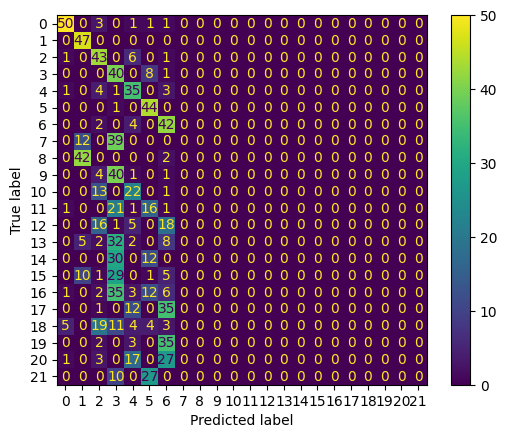

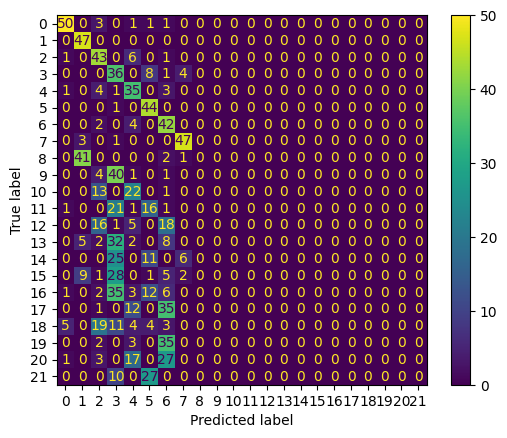

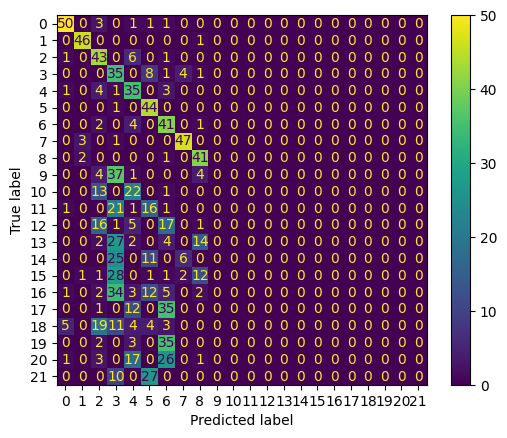

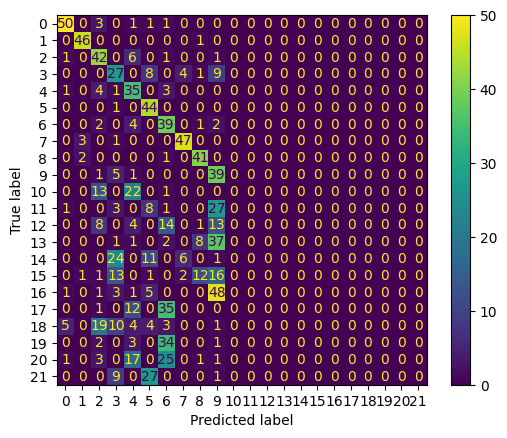

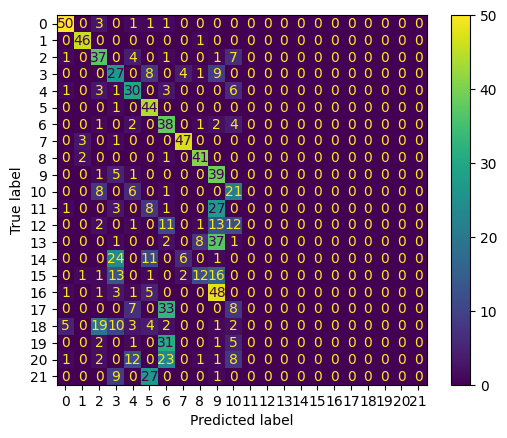

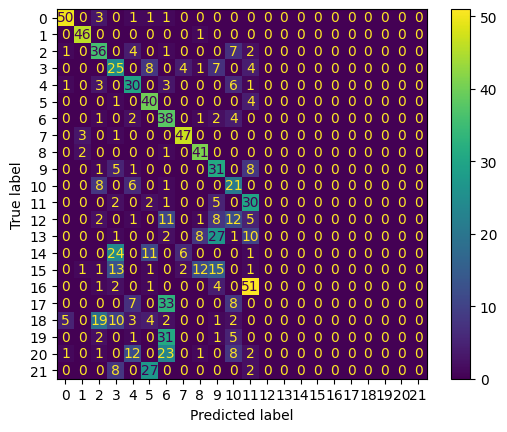

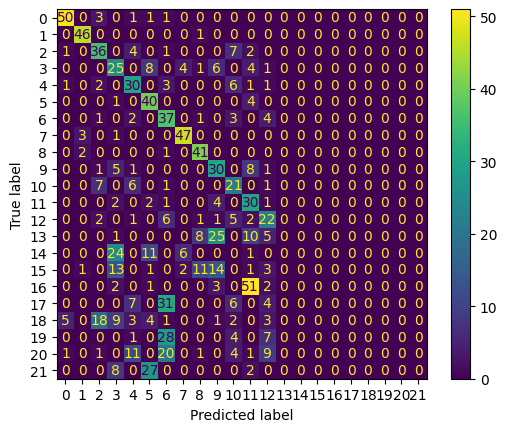

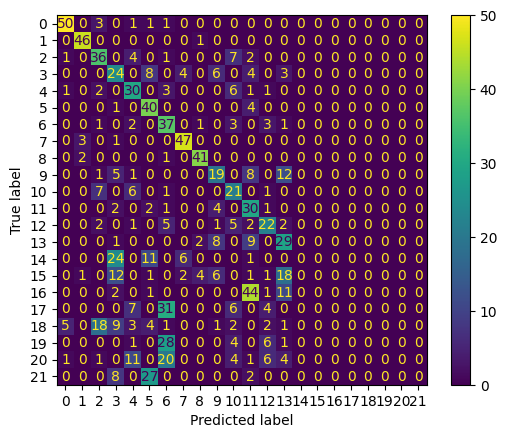

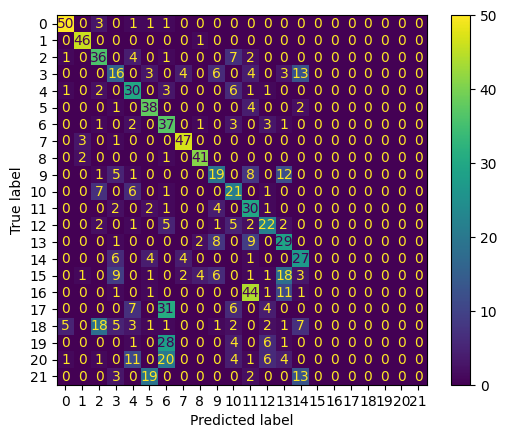

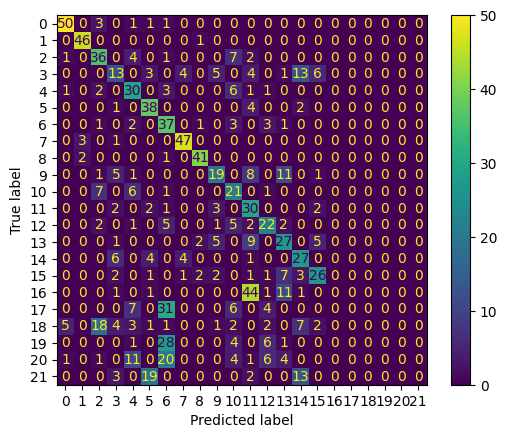

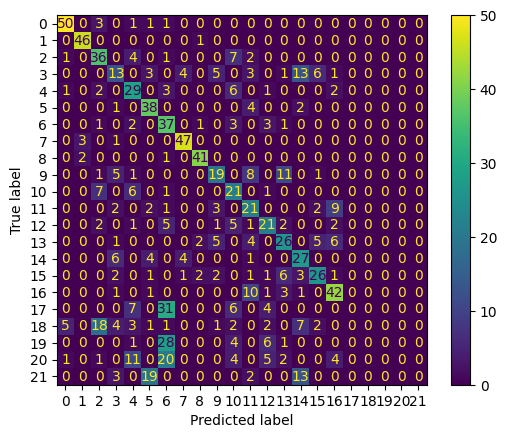

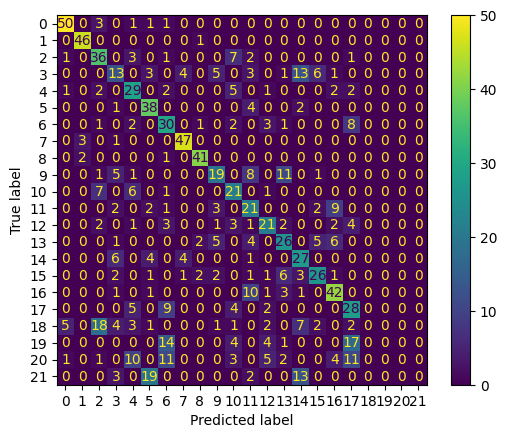

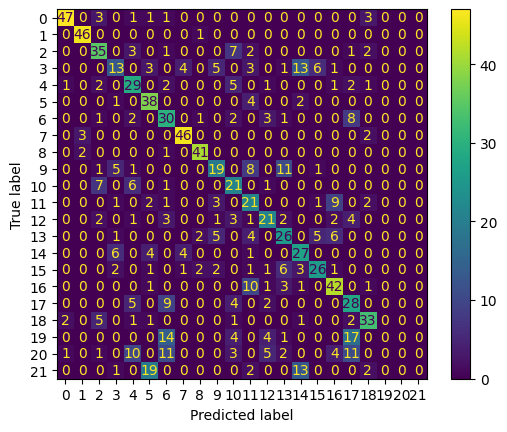

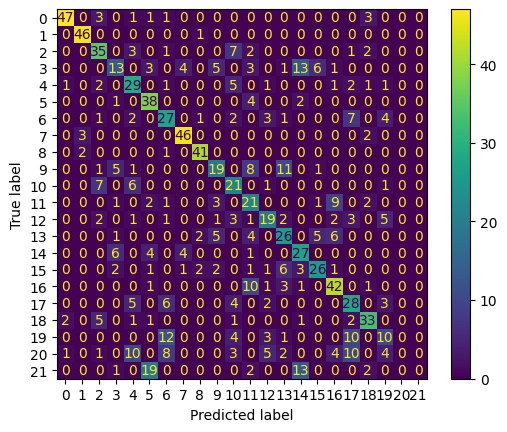

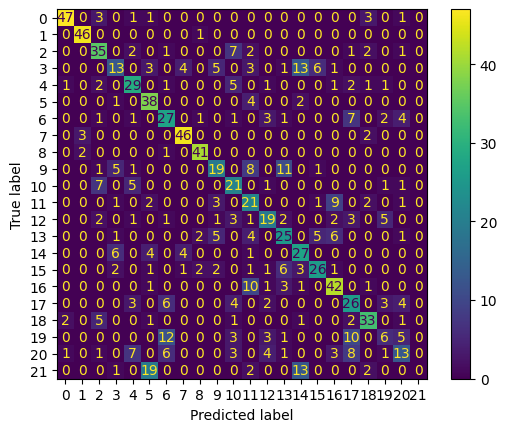

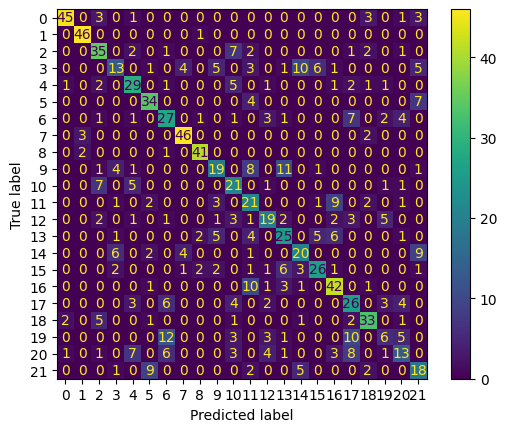

In [84]:
##Split by class, to increment by class:
#Get dataframe of class 1,2,3,4,5,6,7
df1=df.loc[df['y'].isin([1,2,3,4,5,6,7])]
Y1=df1['y']
X1=df1.drop(['y'],axis=1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state=1, shuffle=True)

#Train model
model=MultinomialNB(alpha= 0.9,fit_prior=True)
model.partial_fit(X_train1,y_train1,classes=numbers_of_classes)
print("Accuracy for class 1,2,3,4,5,6,7:",model.score(X_test1,y_test1))
print("accuracy global",model.score(X_test,y_test))

y_pred=model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

for i in range(8, 23):
    df1=df.loc[df["y"].isin([i])]
    Y1=df1['y']
    X1=df1.drop(['y'], axis=1)
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state=1, shuffle=True)

    model.partial_fit(X_train1,y_train1,classes=numbers_of_classes)
    print("Accuracy for class "+str(i)+":",model.score(X_test1,y_test1))
    print("accuracy global",model.score(X_test,y_test))

    y_pred=model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()


Fold  0
accuracy_score on fold  0.6284584980237155
accuracy_score on all:  0.5851778656126482
Fold  1
accuracy_score on fold  0.6877470355731226
accuracy_score on all:  0.5867588932806325
Fold  2
accuracy_score on fold  0.642292490118577
accuracy_score on all:  0.5873517786561265
Fold  3
accuracy_score on fold  0.6067193675889329
accuracy_score on all:  0.5853754940711462
Fold  4
accuracy_score on fold  0.6106719367588933
accuracy_score on all:  0.5857707509881422
Fold  5
accuracy_score on fold  0.5375494071146245
accuracy_score on all:  0.5853754940711462
Fold  6
accuracy_score on fold  0.5652173913043478
accuracy_score on all:  0.5843873517786561
Fold  7
accuracy_score on fold  0.4782608695652174
accuracy_score on all:  0.5845849802371541
Fold  8
accuracy_score on fold  0.5079051383399209
accuracy_score on all:  0.5851778656126482
Fold  9
accuracy_score on fold  0.5296442687747036
accuracy_score on all:  0.5859683794466403


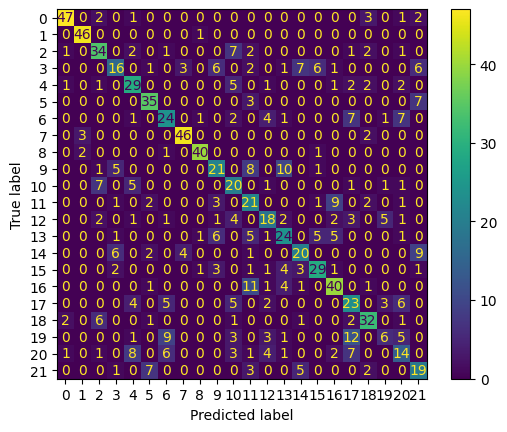

In [85]:
##Split by data, to increment by data:
model=MultinomialNB(alpha= 0.9,fit_prior=True)

number_of_classes = np.linspace(1,22,22)

skf=StratifiedKFold(n_splits=10,shuffle=False)
skf.get_n_splits(X, Y)
for i, (train_index, test_index) in enumerate(skf.split(X, Y)):
     print("Fold ",i)
     df_train_fold=df.iloc[train_index]
     X_train_fold=df_train_fold.drop(['y'],axis=1)
     Y_train_fold=df_train_fold['y']

     df_test_fold=df.iloc[test_index]
     X_test_fold=df_test_fold.drop(['y'],axis=1)
     Y_test_fold=df_test_fold['y']

     model.partial_fit(X_train_fold, Y_train_fold, classes=number_of_classes)
     print("accuracy_score on fold ",accuracy_score(Y_test_fold, model.predict(X_test_fold)))
     print("accuracy_score on all: ",accuracy_score(Y, model.predict(X)))

y_pred=model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()